In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

result: 1.6506136546153223


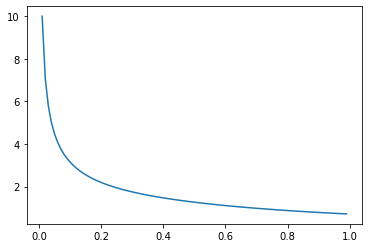

In [16]:
def avg_rectangles(f, a, b, h):
    result = 0
    for x in np.arange(a, b, h):
        result += h * f(x + h/2)
    return result

f = lambda x: 1/np.sqrt(x*(1+x**2))
a, b = 0, 1
delta = 0.01
epsilon = 0.5
h = 0.495 # n = 2, h**2 < 0.25

I1 = avg_rectangles(f, a+delta, b, h)
I2 = epsilon / 2
print("result:", I1 + I2)

x = np.arange(0.01, 1, 0.01)
y = f(x)
plt.plot(x, y)
plt.show()

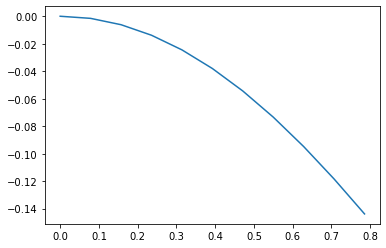

Matrix([
[                 0,                    0],
[0.0785398163397448, -0.00154133040065835],
[  0.15707963267949, -0.00615567158876004],
[ 0.235619449019234,  -0.0138132425392094],
[ 0.314159265358979,  -0.0244616011715892],
[ 0.392699081698724,  -0.0380213082897049],
[ 0.471238898038469,  -0.0543796236968027],
[ 0.549778714378214,  -0.0733820499189632],
[ 0.628318530717959,  -0.0948215768799035],
[ 0.706858347057703,   -0.118425625172635],
[ 0.785398163397448,   -0.143841003633077]])

In [17]:
def runge_kutta(f, x0, y0, h, n):
    x_table, y_table = [x0], [y0]
    
    for i in range(n):
        x, y = x_table[-1], y_table[-1]
        
        k1 = f(x, y)
        k2 = f(x + h/2, y + h/2 * k1)
        k3 = f(x + h/2, y + h/2 * k2)
        k4 = f(x + h, y + h * k3)
        
        x_next = x + h
        y_next = y + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        x_table.append(x_next)
        y_table.append(y_next)
        
    return x_table, y_table

f = lambda x, y: -1/2 * np.sin(2*x) / (2 - np.sin(x)**2)

x, y = runge_kutta(f, 0, 0, np.pi/40, 10)
plt.plot(x, y)
plt.show()
Matrix([x, y]).T

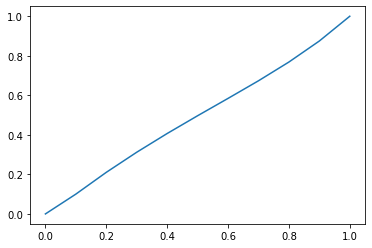

Matrix([
[  0,                 0],
[0.1, 0.100242431530042],
[0.2, 0.210484863060084],
[0.3, 0.312227294590126],
[0.4, 0.407029726120167],
[0.5, 0.496975757650209],
[0.6, 0.584776877180251],
[0.7, 0.673918593510293],
[0.8, 0.768861778256335],
[0.9, 0.875318636996617],
[1.0,  1.00063135757022]])

In [4]:
f = lambda x, y, y_prime: 2*x*y_prime - 2*y + 3*x**2 + x - 1
epsilon = 1e-3
h = 0.1
n = 10

def shooting_method():
    left, right = -100, 100
    shot = shoot(0)
    
    while abs(shot-1) > epsilon:
        if shot > 1:
            right = shot
        elif shot < 1:
            left = shot
        shot = shoot((right + left) / 2)

def shoot(yp):
    global ys, yps, ypps
    
    ys = [0]
    yps = [yp]
    ypps = [1]
    
    x = 0
    for i in range(n):
        y = ys[-1]
        yp = yps[-1]
        ypp = ypps[-1]
        
        x += h
        y += yp * h
        yp += ypp * h
        ypp = f(x, y, yp)
        
        ys.append(y)
        yps.append(yp)
        ypps.append(ypp)
        
    return ys[-1]


shooting_method()

x = np.arange(0, 1.1, 0.1)
plt.plot(x, ys)
plt.show()

Matrix([x, ys]).T